In [2]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import io

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# load files
training_data = pd.read_csv(r"C:\Users\Brandon\Desktop\Home_Depot_Data\train.csv", encoding="ISO-8859-1")
testing_data = pd.read_csv(r"C:\Users\Brandon\Desktop\Home_Depot_Data\test.csv", encoding="ISO-8859-1")
attributes_data = pd.read_csv(r"C:\Users\Brandon\Desktop\Home_Depot_Data\attributes.csv")
descriptions_data = pd.read_csv(r"C:\Users\Brandon\Desktop\Home_Depot_Data\product_descriptions.csv")


In [3]:
# This is how training_data looks like
training_data.head()

,id,product_uid,product_title,search_term,relevance
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67


In [4]:
# merge descriptions
training_data = pd.merge(training_data, descriptions_data, on="product_uid", how="left")

# merge product counts
product_counts = pd.DataFrame(pd.Series(training_data.groupby(["product_uid"]).size(), name="product_count"))
training_data = pd.merge(training_data, product_counts, left_on="product_uid", right_index=True, how="left")

# merge brand names
brand_name = attributes_data[attributes_data.name == "MFG Brand Name"][["product_uid", "value"]].rename(columns={"value": "brand_name"})
training_data = pd.merge(training_data, brand_name, on="product_uid", how="left")
training_data.brand_name.fillna("Unknown", inplace=True)

In [5]:
# This is how training_data looks like after the merging
training_data.head()

,id,product_uid,product_title,search_term,relevance,product_description,product_count,brand_name
0,2,100001,Simpson Strong-Tie 12-Gauge Angle,angle bracket,3.00,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
1,3,100001,Simpson Strong-Tie 12-Gauge Angle,l bracket,2.50,"Not only do angles make joints stronger, they ...",2,Simpson Strong-Tie
2,9,100002,BEHR Premium Textured DeckOver 1-gal. #SC-141 ...,deck over,3.00,BEHR Premium Textured DECKOVER is an innovativ...,1,BEHR Premium Textured DeckOver
3,16,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,rain shower head,2.33,Update your bathroom with the Delta Vero Singl...,2,Delta
4,17,100005,Delta Vero 1-Handle Shower Only Faucet Trim Ki...,shower only faucet,2.67,Update your bathroom with the Delta Vero Singl...,2,Delta


In [6]:
training_data["id_bins"] = pd.cut(training_data.id, 20, labels=False)
print(training_data.corr(method="spearman"))
training_data.describe()

                     id  product_uid  relevance  product_count   id_bins
id             1.000000     1.000000  -0.126681      -0.484873  0.998746
product_uid    1.000000     1.000000  -0.126681      -0.484873  0.998746
relevance     -0.126681    -0.126681   1.000000      -0.026358 -0.126639
product_count -0.484873    -0.484873  -0.026358       1.000000 -0.484009
id_bins        0.998746     0.998746  -0.126639      -0.484009  1.000000


,id,product_uid,relevance,product_count,id_bins
count,74067.000000,74067.000000,74067.000000,74067.000000,74067.000000
mean,112385.709223,142331.911553,2.381634,1.935450,9.648764
std,64016.573650,30770.774864,0.533984,1.706594,5.773127
min,2.000000,100001.000000,1.000000,1.000000,0.000000
25%,57163.500000,115128.500000,2.000000,1.000000,5.000000
50%,113228.000000,137334.000000,2.330000,1.000000,10.000000
75%,168275.500000,166883.500000,3.000000,2.000000,15.000000
max,221473.000000,206650.000000,3.000000,21.000000,19.000000


3.00    19125
2.33    16060
2.67    15202
2.00    11730
1.67     6780
1.33     3006
1.00     2105
2.50       19
2.25       11
2.75       11
1.75        9
1.50        5
1.25        4
Name: relevance, dtype: int64

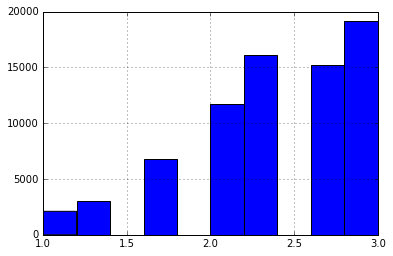

In [7]:
training_data.relevance.hist()
training_data.relevance.value_counts()

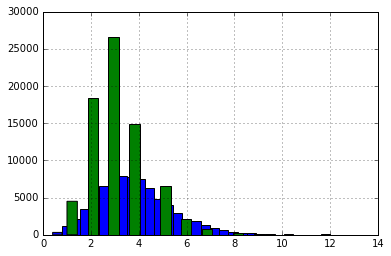

In [8]:
(training_data.search_term.str.len() / 5.).hist(bins=30)
(training_data.search_term.str.count("\\s+") + 1).hist(bins=30)

In [9]:
# Value Counts for Product UID (testing_data)
testing_data.product_uid.value_counts()

101892    52
101280    35
101442    35
101148    34
102456    31
100898    31
102162    30
104691    27
109594    27
101959    26
102235    26
102954    26
101312    26
101024    25
105369    25
102567    25
100941    24
104899    24
100065    24
100526    24
103763    24
101027    23
112119    22
118371    22
102304    22
117268    22
102891    22
100409    22
100885    22
101272    22
          ..
192787     1
182548     1
180501     1
186646     1
174360     1
178458     1
170270     1
168223     1
223520     1
221473     1
143627     1
141576     1
215204     1
147717     1
213157     1
219302     1
217255     1
207016     1
204969     1
211114     1
209067     1
196781     1
125168     1
116980     1
114933     1
119031     1
112890     1
110843     1
162050     1
110474     1
Name: product_uid, dtype: int64